In [77]:
import pandas as pd
import numpy as np
from os import listdir
from os.path import isfile, join
from sklearn.model_selection import train_test_split
from sklearn import svm
from sklearn import metrics
from sklearn.metrics import f1_score
from sklearn.model_selection import cross_validate

from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import Perceptron
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
import xgboost as xgb
import matplotlib.pyplot as plt
import time
import warnings
import random
#!pip install xlwt
import xlwt
from typing_extensions import Counter
#from sklearn.metrics import make_scorer, f1_score, recall_score, precision_score, accuracy_score


warnings.filterwarnings(action = 'ignore')
start_time = time.time()

**Connect the dataset from the drive with the code**



In [78]:
from google.colab import drive
drive.mount('/content/drive')
data_set = []
#tdDirectory="/content/drive/MyDrive/Colab Notebooks/Brain_Networks/children/td/"
#asdDirectory="/content/drive/MyDrive/Colab Notebooks/Brain_Networks/children/asd/"
#tdDirectory="/content/drive/MyDrive/Colab Notebooks/Brain_Networks/eyesclosed/td/"
#asdDirectory="/content/drive/MyDrive/Colab Notebooks/Brain_Networks/eyesclosed/asd/"
#tdDirectory="/content/drive/MyDrive/Colab Notebooks/Brain_Networks/adolescents/td/"
#asdDirectory="/content/drive/MyDrive/Colab Notebooks/Brain_Networks/adolescents/asd/"
tdDirectory="/content/drive/MyDrive/Colab Notebooks/Brain_Networks/male/td/"
asdDirectory="/content/drive/MyDrive/Colab Notebooks/Brain_Networks/male/asd/"
#tdDirectory="/content/drive/MyDrive/Colab Notebooks/Brain_Networks/adhd/td/"
#asdDirectory="/content/drive/MyDrive/Colab Notebooks/Brain_Networks/adhd/asd/"
matSize = 116 # for asd
#matSize=190 # for adhd is (190 X190)

tdFiles = [f for f in listdir(tdDirectory) if isfile(join(tdDirectory, f))]
asdFiles = [f for f in listdir(asdDirectory) if isfile(join(asdDirectory, f))]

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


**For td files, flatten the 116x116 matrix (6786 columns in this table)**


In [79]:
from numpy.core.fromnumeric import shape
for file in tdFiles:
    A = np.loadtxt(tdDirectory + file, dtype=int)
    flattenA = []

    # first flatten the matrix in a single row
    cur = 0
    for row in A:
      for x in row[cur : ]:
        flattenA.append(x)
      cur = cur + 1
    #print(len(flattenA))
    # how to count the number of rows in this list

   # finally add the class variable
    flattenA.append(0.0)
    data_set.append(flattenA)



**For asd files, flatten the 116x116 matrix (6786 columns in this table)**

In [80]:
for file in asdFiles:
    A = np.loadtxt(asdDirectory + file, dtype=int)
    flattenA = []

    # first flatten the matrix in a single row
    cur = 0
    for row in A:
      for x in row[cur:]:
        flattenA.append(x)
      cur = cur + 1

     # finally add the class variable
    flattenA.append(1.0)
    data_set.append(flattenA)

##Split the attributes and corresponding class[td or asd]

In [81]:
data_set = np.array(data_set, dtype=float) #Why is this used before and defined later
X = data_set[:,:-1]
y = data_set[:,-1:]
print(X.shape) #Children td = 52 ; asd= 49

# Printing last 3 columns (tdJaccard, asdJaccard, class)
# print(data_set[:,-1:])

(838, 6786)


**Divide data for training and testing**

In [82]:
# Split dataset into training set and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=109) # 90% training and 10% test

print("Total datasets:", len(X))
print("Train set:", len(X_train))
print("Test  set:", len(X_test))

Total datasets: 838
Train set: 754
Test  set: 84


**Apply SVN**

In [83]:
#Create a svm Classifier
clf = svm.SVC(kernel='linear') # Linear Kernel

#Train the model using the training sets
clf.fit(X_train, y_train)

#Predict the response for test dataset
y_pred = clf.predict(X_test)

print(metrics.accuracy_score(y_test, y_pred))

cm = metrics.confusion_matrix(y_test, y_pred)

Sensitivity = cm[0,0]/(cm[0,0]+cm[0,1])
print(Sensitivity)

Specificity = cm[1,1]/(cm[1,0]+cm[1,1])
print(Specificity)

score = f1_score(y_test, y_pred, average="weighted")
print(score)

0.6071428571428571
0.6756756756756757
0.5531914893617021
0.6076440214640073


**Apply adaboost**

In [84]:
# Create adaboost classifer object
aboost = AdaBoostClassifier(n_estimators=50, learning_rate=1)

aboost.fit(X_train, y_train)

y_pred = aboost.predict(X_test)

print(metrics.accuracy_score(y_test, y_pred))

cm = metrics.confusion_matrix(y_test, y_pred)

Sensitivity = cm[0,0]/(cm[0,0]+cm[0,1])
print(Sensitivity)

Specificity = cm[1,1]/(cm[1,0]+cm[1,1])
print(Specificity)

score = f1_score(y_test, y_pred, average="weighted")
print(score)



0.5238095238095238
0.5405405405405406
0.5106382978723404
0.5254329004329004


**Apply XGBoost**

In [85]:
clf = xgb.XGBClassifier(random_state=1, learning_rate=0.01)

clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)

print(metrics.accuracy_score(y_test, y_pred))

cm = metrics.confusion_matrix(y_test, y_pred)

Sensitivity = cm[0,0]/(cm[0,0]+cm[0,1])
print(Sensitivity)

Specificity = cm[1,1]/(cm[1,0]+cm[1,1])
print(Specificity)

score = f1_score(y_test, y_pred, average="weighted")
print(score)

0.5595238095238095
0.5945945945945946
0.5319148936170213
0.5608364248210991


**Apply NN**

In [86]:
clf = MLPClassifier(solver='lbfgs', alpha=1e-5, hidden_layer_sizes=(10, 2), random_state=1)

clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)

print(metrics.accuracy_score(y_test, y_pred))

cm = metrics.confusion_matrix(y_test, y_pred)

Sensitivity = cm[0,0]/(cm[0,0]+cm[0,1])
print(Sensitivity)

Specificity = cm[1,1]/(cm[1,0]+cm[1,1])
print(Specificity)

score = f1_score(y_test, y_pred, average="weighted")
print(score)

0.5833333333333334
0.6486486486486487
0.5319148936170213
0.5838648712497048


**Apply Decision Tree**

In [87]:
tree = DecisionTreeClassifier()

# fit the model with data
tree.fit(X_train, y_train)

# predict the response for new observations
y_pred = tree.predict(X_test)

print(metrics.accuracy_score(y_test, y_pred))

cm = metrics.confusion_matrix(y_test, y_pred)

Sensitivity = cm[0,0]/(cm[0,0]+cm[0,1])
print(Sensitivity)

Specificity = cm[1,1]/(cm[1,0]+cm[1,1])
print(Specificity)

score = f1_score(y_test, y_pred, average="weighted")
print(score)

0.4523809523809524
0.40540540540540543
0.48936170212765956
0.4536340852130326


**Apply Naive Bayes**

In [88]:
nb = GaussianNB()

nb.fit(X_train, y_train)

# predict the response for new observations
y_pred = nb.predict(X_test)

print(metrics.accuracy_score(y_test, y_pred))

cm = metrics.confusion_matrix(y_test, y_pred)

Sensitivity = cm[0,0]/(cm[0,0]+cm[0,1])
print(Sensitivity)

Specificity = cm[1,1]/(cm[1,0]+cm[1,1])
print(Specificity)

score = f1_score(y_test, y_pred, average="weighted")
print(score)

0.5476190476190477
0.7567567567567568
0.3829787234042553
0.5346121197185026


**Apply Perceptron**

In [89]:
percep = Perceptron()

percep.fit(X_train, y_train)

# predict the response for new observations
y_pred = percep.predict(X_test)

print(metrics.accuracy_score(y_test, y_pred))

cm = metrics.confusion_matrix(y_test, y_pred)

Sensitivity = cm[0,0]/(cm[0,0]+cm[0,1])
print(Sensitivity)

Specificity = cm[1,1]/(cm[1,0]+cm[1,1])
print(Specificity)

score = f1_score(y_test, y_pred, average="weighted")
print(score)

0.5952380952380952
0.7567567567567568
0.46808510638297873
0.5897028897028896


**Apply Logistic Regression**

In [90]:
logreg = LogisticRegression()

logreg.fit(X_train, y_train)

# predict the response for new observations
y_pred = logreg.predict(X_test)

print(metrics.accuracy_score(y_test, y_pred))

cm = metrics.confusion_matrix(y_test, y_pred)

Sensitivity = cm[0,0]/(cm[0,0]+cm[0,1])
print(Sensitivity)

Specificity = cm[1,1]/(cm[1,0]+cm[1,1])
print(Specificity)

score = f1_score(y_test, y_pred, average="weighted")
print(score)

0.5833333333333334
0.6216216216216216
0.5531914893617021
0.5845749964523911


**Apply KNN**

In [91]:
knn = KNeighborsClassifier(n_neighbors=1)

knn.fit(X_train, y_train)

# predict the response for new observations
y_pred = knn.predict(X_test)

print(metrics.accuracy_score(y_test, y_pred))

cm = metrics.confusion_matrix(y_test, y_pred)

Sensitivity = cm[0,0]/(cm[0,0]+cm[0,1])
print(Sensitivity)

Specificity = cm[1,1]/(cm[1,0]+cm[1,1])
print(Specificity)

score = f1_score(y_test, y_pred, average="weighted")
print(score)

0.5714285714285714
0.6756756756756757
0.48936170212765956
0.5699700186370633


**Metrics for 9 Classifiers in 90:10 split (Normal - Split)**

In [92]:
rows_list = []

#SVN
#Create a svm Classifier
clf_svn = svm.SVC(kernel='linear') # Linear Kernel
#Train the model using the training sets
clf_svn.fit(X_train, y_train)
#Predict the response for test dataset
y_pred_svn = clf_svn.predict(X_test)

cm_svn = metrics.confusion_matrix(y_test, y_pred_svn)
Sensitivity_svn = cm_svn[0,0]/(cm_svn[0,0]+cm_svn[0,1])
Specificity_svn = cm_svn[1,1]/(cm_svn[1,0]+cm_svn[1,1])
score_svn = f1_score(y_test, y_pred_svn, average="weighted")


#Ada Boost
# Create adaboost classifer object
aboost = AdaBoostClassifier(n_estimators=50, learning_rate=1,random_state=42)
aboost.fit(X_train, y_train)
y_pred_aboost = aboost.predict(X_test)

cm_aboost = metrics.confusion_matrix(y_test, y_pred_aboost)
Sensitivity_aboost = cm_aboost[0,0]/(cm_aboost[0,0]+cm_aboost[0,1])
Specificity_aboost = cm_aboost[1,1]/(cm_aboost[1,0]+cm_aboost[1,1])
score_aboost = f1_score(y_test, y_pred_aboost, average="weighted")


#XG Boost
clf_xgb = xgb.XGBClassifier(learning_rate=0.01)
clf_xgb.fit(X_train, y_train)
y_pred_XG = clf_xgb.predict(X_test)

cm_XG = metrics.confusion_matrix(y_test, y_pred_XG)
Sensitivity_XG = cm_XG[0,0]/(cm_XG[0,0]+cm_XG[0,1])
Specificity_XG = cm_XG[1,1]/(cm_XG[1,0]+cm_XG[1,1])
score_XG = f1_score(y_test, y_pred_XG, average="weighted")


# NN
clf_NN = MLPClassifier(solver='lbfgs', alpha=1e-5, hidden_layer_sizes=(10, 2), random_state=42)
clf_NN.fit(X_train, y_train)
y_pred_NN = clf_NN.predict(X_test)

cm_NN = metrics.confusion_matrix(y_test, y_pred_NN)
Sensitivity_NN = cm_NN[0,0]/(cm_NN[0,0]+cm_NN[0,1])
Specificity_NN = cm_NN[1,1]/(cm_NN[1,0]+cm_NN[1,1])
score_NN = f1_score(y_test, y_pred_NN, average="weighted")



#Decision Tree
tree = DecisionTreeClassifier(random_state=42)
# fit the model with data
tree.fit(X_train, y_train)
# predict the response for new observations
y_pred_tree = tree.predict(X_test)

cm_tree = metrics.confusion_matrix(y_test, y_pred_tree)
Sensitivity_tree = cm_tree[0,0]/(cm_tree[0,0]+cm_tree[0,1])
Specificity_tree = cm_tree[1,1]/(cm_tree[1,0]+cm_tree[1,1])
score_tree = f1_score(y_test, y_pred_tree, average="weighted")


#Naive Bayes
nb = GaussianNB()
nb.fit(X_train, y_train)
# predict the response for new observations
y_pred_nb = nb.predict(X_test)

cm_nb = metrics.confusion_matrix(y_test, y_pred_nb)
Sensitivity_nb = cm_nb[0,0]/(cm_nb[0,0]+cm_nb[0,1])
Specificity_nb = cm_nb[1,1]/(cm_nb[1,0]+cm_nb[1,1])
score_nb = f1_score(y_test, y_pred_nb, average="weighted")


#Perceptron
percep = Perceptron()
percep.fit(X_train, y_train)
# predict the response for new observations
y_pred_percep = percep.predict(X_test)

cm_percep = metrics.confusion_matrix(y_test, y_pred_percep)
Sensitivity_percep = cm_percep[0,0]/(cm_percep[0,0]+cm_percep[0,1])
Specificity_percep = cm_percep[1,1]/(cm_percep[1,0]+cm_percep[1,1])
score_percep = f1_score(y_test, y_pred_percep, average="weighted")



#Logistic Regression
logreg = LogisticRegression()
logreg.fit(X_train, y_train)
# predict the response for new observations
y_pred_logreg = logreg.predict(X_test)

cm_logreg = metrics.confusion_matrix(y_test, y_pred_logreg)
Sensitivity_logreg = cm_logreg[0,0]/(cm_logreg[0,0]+cm_logreg[0,1])
Specificity_logreg = cm_logreg[1,1]/(cm_logreg[1,0]+cm_logreg[1,1])
score_logreg = f1_score(y_test, y_pred_logreg, average="weighted")


#KNN
knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(X_train, y_train)
# predict the response for new observations
y_pred_knn = knn.predict(X_test)
cm_knn = metrics.confusion_matrix(y_test, y_pred_knn)
Sensitivity_knn = cm_knn[0,0]/(cm_knn[0,0]+cm_knn[0,1])
Specificity_knn = cm_knn[1,1]/(cm_knn[1,0]+cm_knn[1,1])
score_knn = f1_score(y_test, y_pred_knn, average="weighted")


"""
#Print accuracy of all classifiers
print(metrics.accuracy_score(y_test, y_pred_svn))
print(metrics.accuracy_score(y_test, y_pred_aboost))
print(metrics.accuracy_score(y_test, y_pred_XG))
print(metrics.accuracy_score(y_test, y_pred_NN))
print(metrics.accuracy_score(y_test, y_pred_tree))
print(metrics.accuracy_score(y_test, y_pred_nb))
print(metrics.accuracy_score(y_test, y_pred_percep))
print(metrics.accuracy_score(y_test, y_pred_logreg))
print(metrics.accuracy_score(y_test, y_pred_knn))

#Print sensitivity of all classifiers
print(Sensitivity_svn)
print(Sensitivity_aboost)
print(Sensitivity_XG)
print(Sensitivity_NN)
print(Sensitivity_tree)
print(Sensitivity_nb)
print(Sensitivity_percep)
print(Sensitivity_logreg)
print(Sensitivity_knn)

#Print specificity of all classifiers

print(Specificity_svn)
print(Specificity_aboost)
print(Specificity_XG)
print(Specificity_NN)
print(Specificity_tree)
print(Specificity_nb)
print(Specificity_percep)
print(Specificity_logreg)
print(Specificity_knn)


#Print F1 score of all classifiers

print(score_svn)
print(score_aboost)
print(score_XG)
print(score_NN)
print(score_tree)
print(score_nb)
print(score_percep)
print(score_logreg)
print(score_knn)
"""

#Store accuracy of all classifiers into a list
rows_list.append(['SVN','Accuracy',metrics.accuracy_score(y_test, y_pred_svn)])
rows_list.append(['AB','Accuracy',metrics.accuracy_score(y_test, y_pred_aboost)])
rows_list.append(['XG','Accuracy',metrics.accuracy_score(y_test, y_pred_XG)])
rows_list.append(['NN','Accuracy',metrics.accuracy_score(y_test, y_pred_NN)])
rows_list.append(['DT','Accuracy',metrics.accuracy_score(y_test, y_pred_tree)])
rows_list.append(['NB','Accuracy',metrics.accuracy_score(y_test, y_pred_nb)])
rows_list.append(['PC','Accuracy',metrics.accuracy_score(y_test, y_pred_percep)])
rows_list.append(['LG','Accuracy',metrics.accuracy_score(y_test, y_pred_logreg)])
rows_list.append(['KN','Accuracy',metrics.accuracy_score(y_test, y_pred_knn)])


#Store sensitivity of all classifiers into a list
rows_list.append(['SVN','Sensitivity',Sensitivity_svn])
rows_list.append(['AB','Sensitivity',Sensitivity_aboost])
rows_list.append(['XG','Sensitivity',Sensitivity_XG])
rows_list.append(['NN','Sensitivity',Sensitivity_NN])
rows_list.append(['DT','Sensitivity',Sensitivity_tree])
rows_list.append(['NB','Sensitivity',Sensitivity_nb])
rows_list.append(['PC','Sensitivity',Sensitivity_percep])
rows_list.append(['LG','Sensitivity',Sensitivity_logreg])
rows_list.append(['KN','Sensitivity',Sensitivity_knn])

#Store specificity of all classifiers into a list
rows_list.append(['SVN','Specificity',Specificity_svn])
rows_list.append(['AB','Specificity',Specificity_aboost])
rows_list.append(['XG','Specificity',Specificity_XG])
rows_list.append(['NN','Specificity',Specificity_NN])
rows_list.append(['DT','Specificity',Specificity_tree])
rows_list.append(['NB','Specificity',Specificity_nb])
rows_list.append(['PC','Specificity',Specificity_percep])
rows_list.append(['LG','Specificity',Specificity_logreg])
rows_list.append(['KN','Specificity',Specificity_knn])

#Store F1 Score of all classifiers into a list
rows_list.append(['SVN','F1-Score',score_svn])
rows_list.append(['AB','F1-Score',score_aboost])
rows_list.append(['XG','F1-Score',score_XG])
rows_list.append(['NN','F1-Score',score_NN])
rows_list.append(['DT','F1-Score',score_tree])
rows_list.append(['NB','F1-Score',score_nb])
rows_list.append(['PC','F1-Score',score_percep])
rows_list.append(['LG','F1-Score',score_logreg])
rows_list.append(['KN','F1-Score',score_knn])

print(rows_list)

[['SVN', 'Accuracy', 0.6071428571428571], ['AB', 'Accuracy', 0.5238095238095238], ['XG', 'Accuracy', 0.5595238095238095], ['NN', 'Accuracy', 0.5833333333333334], ['DT', 'Accuracy', 0.5], ['NB', 'Accuracy', 0.5476190476190477], ['PC', 'Accuracy', 0.5952380952380952], ['LG', 'Accuracy', 0.5833333333333334], ['KN', 'Accuracy', 0.5714285714285714], ['SVN', 'Sensitivity', 0.6756756756756757], ['AB', 'Sensitivity', 0.5405405405405406], ['XG', 'Sensitivity', 0.5945945945945946], ['NN', 'Sensitivity', 0.6216216216216216], ['DT', 'Sensitivity', 0.4864864864864865], ['NB', 'Sensitivity', 0.7567567567567568], ['PC', 'Sensitivity', 0.7567567567567568], ['LG', 'Sensitivity', 0.6216216216216216], ['KN', 'Sensitivity', 0.6756756756756757], ['SVN', 'Specificity', 0.5531914893617021], ['AB', 'Specificity', 0.5106382978723404], ['XG', 'Specificity', 0.5319148936170213], ['NN', 'Specificity', 0.5531914893617021], ['DT', 'Specificity', 0.5106382978723404], ['NB', 'Specificity', 0.3829787234042553], ['PC',

In [93]:
metrics_dict = dict()
metrics_dict[''] = ['Accuracy','Sensitivity','Specificity','F1-Score']

for row in rows_list:
    classifier = row[0]
    value_type = row[1]
    value = row[2]
    if classifier not in metrics_dict:
        metrics_dict[classifier] = ['','','','']
    metrics_dict[classifier][0 if value_type == 'Accuracy' else 1 if value_type == 'Sensitivity' else 2 if value_type == 'Specificity' else 3] = value
    #print(metrics_dict)

print("Metrics of 9 different classifiers")
df=pd.DataFrame.from_dict(metrics_dict)
df.to_csv('/content/drive/MyDrive/Colab Notebooks/Brain_Networks/Results/Children_all_metrics_classifiers_Normal_Split.csv', index=False)

Metrics of 9 different classifiers


In [94]:
"""
performance = pd.DataFrame(rows_list, columns=['classifier','Accuracy'])
performance = performance.reset_index()
performance.pivot('classifier','index','Accuracy').plot(kind='bar', figsize=(5, 5), width=0.3, rot=5,legend=False) # stacked=True
plt.title("Accuracy of 9 classifiers with standard 90:10 split")
plt.yticks(np.arange(0, 1, step=0.1))
plt.ylabel('accuracy')
plt.show()
"""

'\nperformance = pd.DataFrame(rows_list, columns=[\'classifier\',\'Accuracy\'])\nperformance = performance.reset_index()\nperformance.pivot(\'classifier\',\'index\',\'Accuracy\').plot(kind=\'bar\', figsize=(5, 5), width=0.3, rot=5,legend=False) # stacked=True\nplt.title("Accuracy of 9 classifiers with standard 90:10 split")\nplt.yticks(np.arange(0, 1, step=0.1))\nplt.ylabel(\'accuracy\')\nplt.show()\n'

<b>Accuracy only for 9 Classifiers using 10 - Fold cross validation</b>


In [95]:
rows_list2 = []

clfCross = cross_validate(clf_svn, X, y, cv=10) #SVN
aboostCross = cross_validate(aboost, X, y, cv=10) #Ada Boost
clfCrossXG = cross_validate(clf_xgb, X, y, cv=10)#XG Boost
clfCrossNN = cross_validate(clf_NN, X, y, cv=10)#NN
treeCross = cross_validate(tree, X, y, cv=10)#Decision Tree
nbCross = cross_validate(nb, X, y, cv=10)#Naive Bayes
percepCross = cross_validate(percep, X, y, cv=10)#Perceptron
KnnCross = cross_validate(knn, X, y, cv=10)#knn
logregCross = cross_validate(logreg, X, y, cv=10)#Log Reg

#rows_list2.append(['Decision Tree', treeCross['test_score']])
rows_list2.append(['SVN', clfCross['test_score'].mean()])
rows_list2.append(['AB', aboostCross['test_score'].mean()])
rows_list2.append(['XG', clfCrossXG['test_score'].mean()])
rows_list2.append(['NN', clfCrossNN['test_score'].mean()])
rows_list2.append(['DT', treeCross['test_score'].mean()])
rows_list2.append(['NB', nbCross['test_score'].mean()])
rows_list2.append(['PC', percepCross['test_score'].mean()])
rows_list2.append(['KNN', KnnCross['test_score'].mean()])
rows_list2.append(['LR', logregCross['test_score'].mean()])

accuracy_list = dict()
accuracy_list[''] = ['Mean Accuracy']
for row in rows_list2:
    if row[0] not in accuracy_list:
        accuracy_list[row[0]] = []
    accuracy_list[row[0]].append(row[1])

print("Mean Accuracy of different classifiers using cross-validation approach with 10 folds")
pd.DataFrame.from_dict(accuracy_list)


Mean Accuracy of different classifiers using cross-validation approach with 10 folds


,,SVN,AB,XG,NN,DT,NB,PC,KNN,LR
0,Mean Accuracy,0.594464,0.535915,0.534768,0.576563,0.503471,0.551434,0.588468,0.526334,0.594449


**<b>ALL metrics for 9 Classifiers using 10 - Fold cross validation</b>**

In [96]:
from sklearn.metrics import confusion_matrix, classification_report, f1_score

rows_list2 = []

# define the classifiers
classifiers = {
    'SVM': clf_svn,
    'AB': aboost,
    'XG Boost': clf_xgb,
    'NN': clf_NN,
    'DT': tree,
    'NB': nb,
    'PC': percep,
    'KNN': knn,
    'LR': logreg
}

# iterate over the classifiers
for name, clf in classifiers.items():
    # compute cross-validation scores
    scores = cross_validate(clf, X, y, cv=10, scoring=('accuracy', 'precision', 'recall', 'f1'))
    # compute mean scores
    mean_scores = {
        'Accuracy': scores['test_accuracy'].mean(),
        'Precision': scores['test_precision'].mean(),
        'Recall': scores['test_recall'].mean(),
        'F1 Score': scores['test_f1'].mean()
    }
    # store the results in a list
    row = [name] + list(mean_scores.values())
    rows_list2.append(row)

# create a pandas DataFrame from the list of results
columns = ['Classifier', 'Accuracy', 'Precision', 'Recall', 'F1 Score']
df = pd.DataFrame(rows_list2, columns=columns)
print(df)
df.to_csv('/content/drive/MyDrive/Colab Notebooks/Brain_Networks/Results/Children_all_metrics_classifiers_cv10.csv', index=False)

  Classifier  Accuracy  Precision    Recall  F1 Score
0        SVM  0.594464   0.596840  0.578571  0.586087
1         AB  0.535915   0.537475  0.547619  0.541512
2   XG Boost  0.534768   0.534831  0.521429  0.523454
3         NN  0.576563   0.586084  0.530952  0.554789
4         DT  0.503471   0.502824  0.521429  0.509532
5         NB  0.551434   0.593664  0.385714  0.457634
6         PC  0.588468   0.598225  0.573810  0.576619
7        KNN  0.526334   0.536401  0.459524  0.491086
8         LR  0.594449   0.595469  0.576190  0.584376


**Mean and Precision of all the 9 classifiers using 10 Fold CV - Chart**

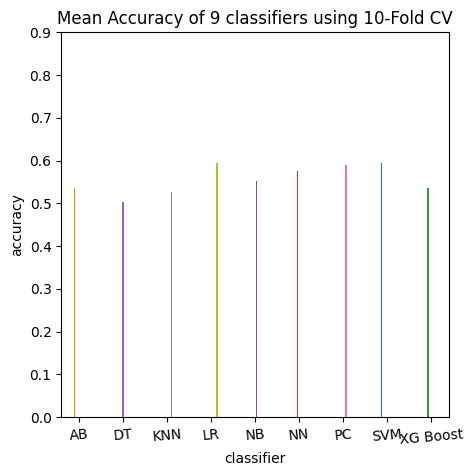

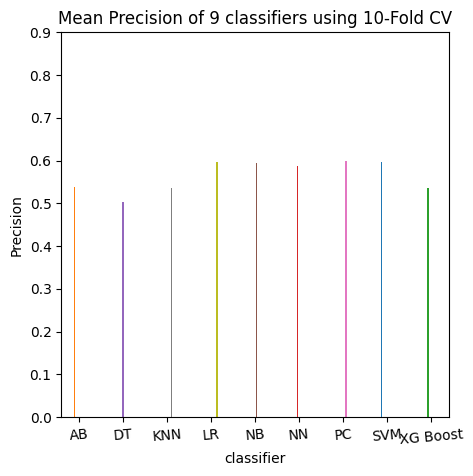

In [97]:
performance = pd.DataFrame(rows_list2, columns=['classifier','Accuracy','Precision','Recall','F1-Score'])
performance = performance.reset_index()
performance.pivot('classifier','index','Accuracy').plot(kind='bar', figsize=(5, 5), width=0.3, rot=5,legend=False) # stacked=True
plt.title("Mean Accuracy of 9 classifiers using 10-Fold CV")
plt.yticks(np.arange(0, 1, step=0.1))
plt.ylabel('accuracy')
plt.show()

performance.pivot('classifier','index','Precision').plot(kind='bar', figsize=(5, 5), width=0.3, rot=5,legend=False) # stacked=True
plt.title("Mean Precision of 9 classifiers using 10-Fold CV")
plt.yticks(np.arange(0, 1, step=0.1))
plt.ylabel('Precision')
plt.show()



**All metrics and ALL classifiers plotted in bar chart**

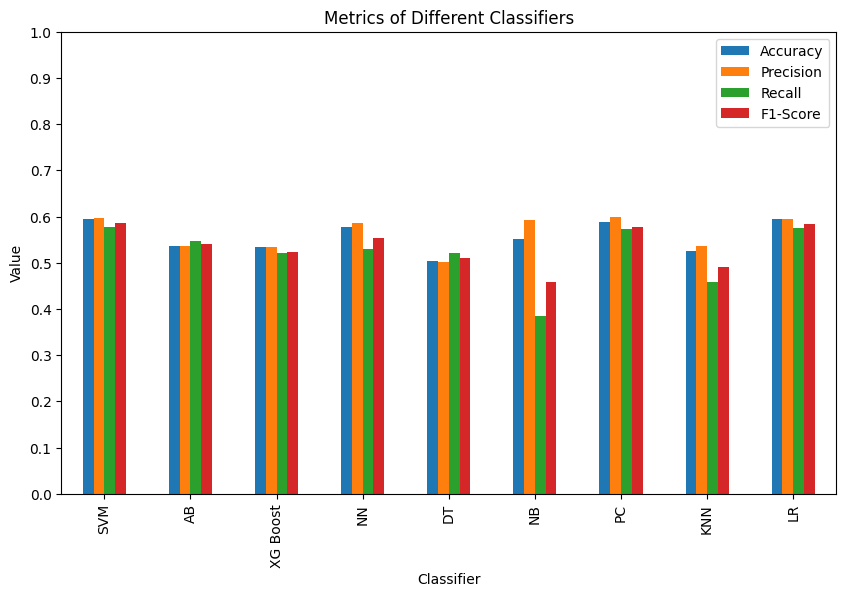

In [98]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

performance = pd.DataFrame(rows_list2, columns=['classifier','Accuracy','Precision','Recall','F1-Score'])

# Assuming you have a DataFrame named 'performance' with columns ['classifier', 'Accuracy', 'Precision', 'Recall', 'F1-Score']

performance = performance.set_index('classifier')  # Set 'classifier' column as the index

# Plot the bar chart
performance.plot(kind='bar', figsize=(10, 6))

# Set the title and labels
plt.title("Metrics of Different Classifiers")
plt.xlabel('Classifier')
plt.ylabel('Value')

# Set the y-axis range and ticks
plt.ylim(0, 1)
plt.yticks(np.arange(0, 1.1, step=0.1))

# Display the legend
plt.legend()

# Show the plot
plt.show()

**All metrics and Top 3 classifiers plotted in bar chart**

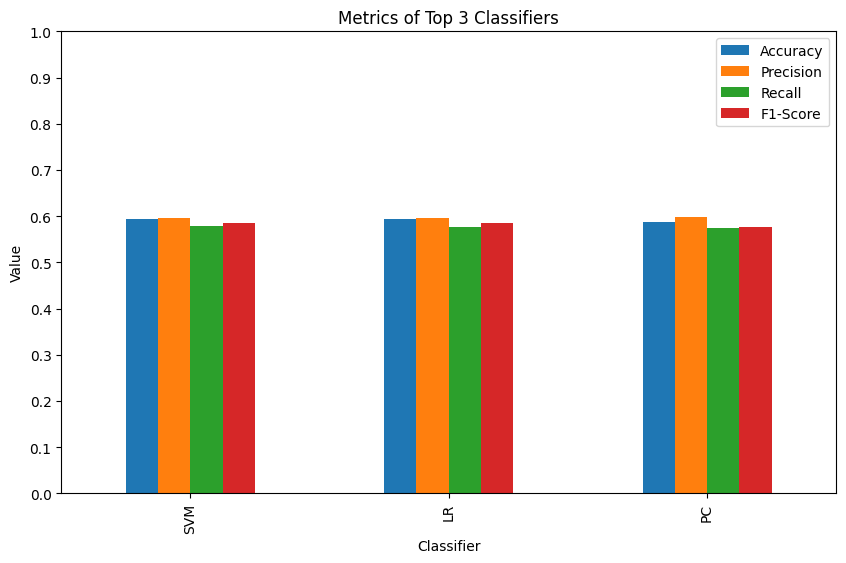

In [99]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

performance = pd.DataFrame(rows_list2, columns=['classifier','Accuracy','Precision','Recall','F1-Score'])

# Assuming you have a DataFrame named 'performance' with columns ['classifier', 'Accuracy', 'Precision', 'Recall', 'F1-Score']

# Sort the DataFrame based on a specific metric (e.g., 'Accuracy')
performance = performance.sort_values(by='Accuracy', ascending=False)

# Select the top 3 classifiers
top_3_classifiers = performance.head(3)

top_3_classifiers = top_3_classifiers.set_index('classifier')  # Set 'classifier' column as the index

# Plot the bar chart
top_3_classifiers.plot(kind='bar', figsize=(10, 6))

# Set the title and labels
plt.title("Metrics of Top 3 Classifiers")
plt.xlabel('Classifier')
plt.ylabel('Value')

# Set the y-axis range and ticks
plt.ylim(0, 1)
plt.yticks(np.arange(0, 1.1, step=0.1))

# Display the legend
plt.legend()

# Show the plot
plt.show()

**All metrics and ALL classifiers plotted in bar chart (with metrics in the rows)**

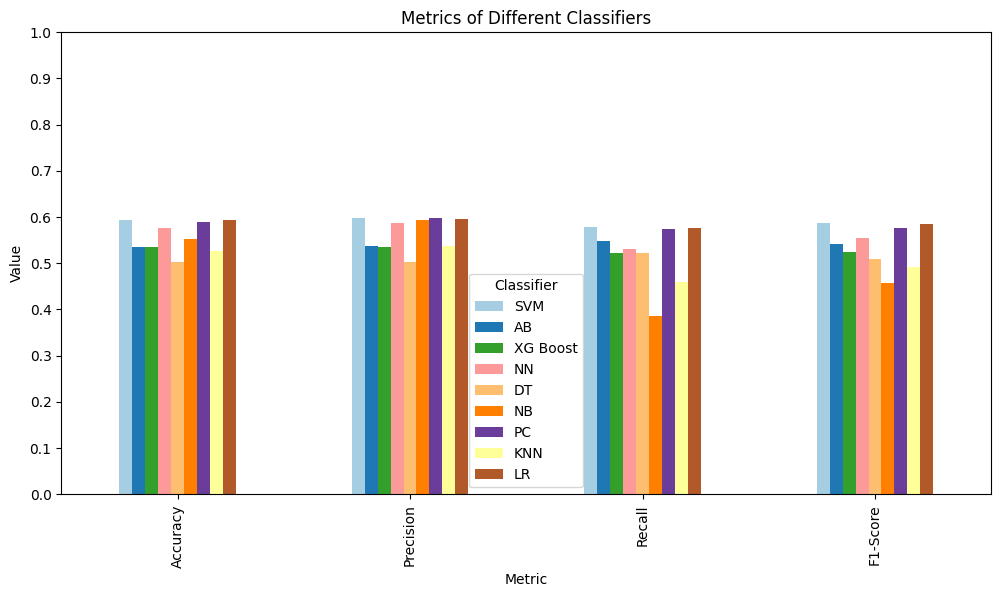

In [100]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

performance = pd.DataFrame(rows_list2, columns=['classifier','Accuracy','Precision','Recall','F1-Score'])
# Assuming you have a DataFrame named 'performance' with columns ['classifier', 'Accuracy', 'Precision', 'Recall', 'F1-Score']

# Set 'classifier' column as the index
performance = performance.set_index('classifier')

# Transpose the DataFrame to have metrics as columns
performance = performance.T

# Plot the bar chart with colored bars
performance.plot(kind='bar', figsize=(12, 6), colormap='Paired')

# Set the title and labels
plt.title("Metrics of Different Classifiers")
plt.xlabel('Metric')
plt.ylabel('Value')

# Set the y-axis range and ticks
plt.ylim(0, 1)
plt.yticks(np.arange(0, 1.1, step=0.1))

# Display the legend
plt.legend(title='Classifier')

# Show the plot
plt.show()

**All metrics and Top 3 classifiers plotted in bar chart (Metrics in the row)**

  classifier  Accuracy  Precision    Recall  F1-Score
0        SVM  0.594464   0.596840  0.578571  0.586087
8         LR  0.594449   0.595469  0.576190  0.584376
6         PC  0.588468   0.598225  0.573810  0.576619


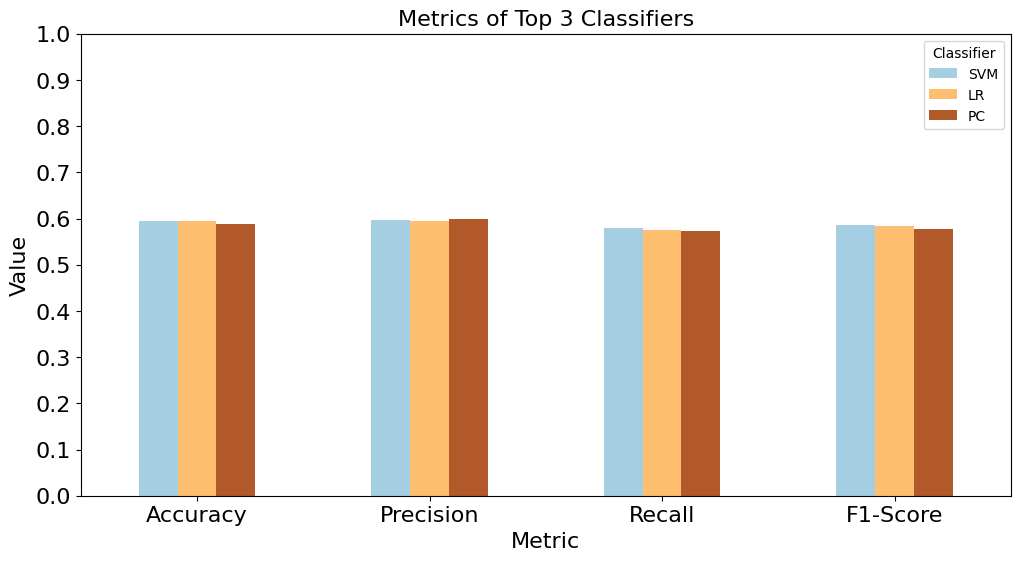

In [101]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

performance = pd.DataFrame(rows_list2, columns=['classifier','Accuracy','Precision','Recall','F1-Score'])
# Assuming you have a DataFrame named 'performance' with columns ['classifier', 'Accuracy', 'Precision', 'Recall', 'F1-Score']

# Sort the DataFrame based on a specific metric (e.g., 'Accuracy')
performance = performance.sort_values(by='Accuracy', ascending=False)

# Select the top 3 classifiers
top_3_classifiers = performance.head(3)
print(top_3_classifiers)

# Set 'classifier' column as the index
top_3_classifiers = top_3_classifiers.set_index('classifier')

# Transpose the DataFrame to have metrics as columns
top_3_classifiers = top_3_classifiers.T

# Define custom colors for the bars
#colors = ['red', 'orange', 'green']

# Plot the bar chart with colored bars
ax = top_3_classifiers.plot(kind='bar', figsize=(12, 6), colormap='Paired')

# Set the title and labels
plt.title("Metrics of Top 3 Classifiers",fontsize=16)
plt.xlabel('Metric',fontsize=16)
plt.ylabel('Value',fontsize=16)

# Set the y-axis range and ticks
plt.ylim(0, 1)
plt.yticks(np.arange(0, 1.1, step=0.1),fontsize=16)

# Set the x-axis tick labels rotation to 0 degrees (horizontal)
ax.tick_params(axis='x', rotation=0,labelsize=16)

# Display the legend
plt.legend(title='Classifier')

# Save the plot as a PDF file
plt.savefig('/content/drive/MyDrive/Colab Notebooks/Brain_Networks/Results/chart.png', format='png')

# Show the plot
plt.show()